In [2]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
%matplotlib inline 

import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp

In [3]:
data = pd.read_csv('../Data/Datasets/googletopics_weekid_v3.csv')

In [14]:
data.sort_values('week_id')
data.head()

,Unnamed: 0,rel_val,topic,week_dt,year,month,week_of_year,week_id
0,0,14.0,trump,2016-05-01,2016,5,17,2016-17
1,1,9.0,trump,2016-05-08,2016,5,18,2016-18
2,2,8.0,trump,2016-05-15,2016,5,19,2016-19
3,3,8.0,trump,2016-05-22,2016,5,20,2016-20
4,4,8.0,trump,2016-05-29,2016,5,21,2016-21


In [20]:
ufos = pd.read_csv('../Data/Datasets/weekly_ufopct_entrtm.csv')
ufos.sort_values('week_id')

ufos = ufos.assign( year = ufos['week_id']
ufos

,Unnamed: 0,week_id,weekly_ufocount,weekly_pct_entrtm,year
0,0,2014-27,470,100.000000,0
1,1,2015-45,406,86.382979,0
2,2,2020-16,403,85.744681,0
3,3,2013-27,399,84.893617,0
4,4,2012-27,339,72.127660,0
...,...,...,...,...,...
763,763,2006-9,5,1.063830,0
764,764,2006-12,5,1.063830,0
765,765,2006-1,3,0.638298,0
766,766,2006-8,2,0.425532,0


#### Plotting Corona and Ufos

In [6]:
corona = data.loc[data['topic'] == 'corona'] 

In [11]:
combined = pd.merge(ufos , corona , how = 'inner', on = 'week_id')
combined.sort_values('week_id')

,Unnamed: 0_x,week_id,weekly_ufocount,weekly_pct_entrtm,Unnamed: 0_y,rel_val,topic,week_dt,year,month,week_of_year
43,366,2019-35,85,18.085106,0,0.5,corona,2019-09-01,2019,9,35
49,490,2019-36,71,15.106383,1,0.5,corona,2019-09-08,2019,9,36
33,244,2019-37,101,21.489362,2,0.5,corona,2019-09-15,2019,9,37
18,94,2019-38,143,30.425532,3,0.5,corona,2019-09-22,2019,9,38
9,58,2019-39,157,33.404255,4,0.5,corona,2019-09-29,2019,9,39
13,72,2019-40,151,32.127660,5,0.5,corona,2019-10-06,2019,10,40
7,48,2019-41,164,34.893617,6,0.5,corona,2019-10-13,2019,10,41
29,203,2019-42,111,23.617021,7,0.5,corona,2019-10-20,2019,10,42
26,194,2019-43,113,24.042553,8,0.5,corona,2019-10-27,2019,10,43
36,295,2019-44,93,19.787234,9,0.5,corona,2019-11-03,2019,11,44


In [8]:
# adding column with relative values for ufos during corona period 
max_ufo_cor = combined['weekly_ufocount'].max()
combined = combined.assign(ufo_perc_cor = (combined['weekly_ufocount'] / max_ufo_cor)* 100 )

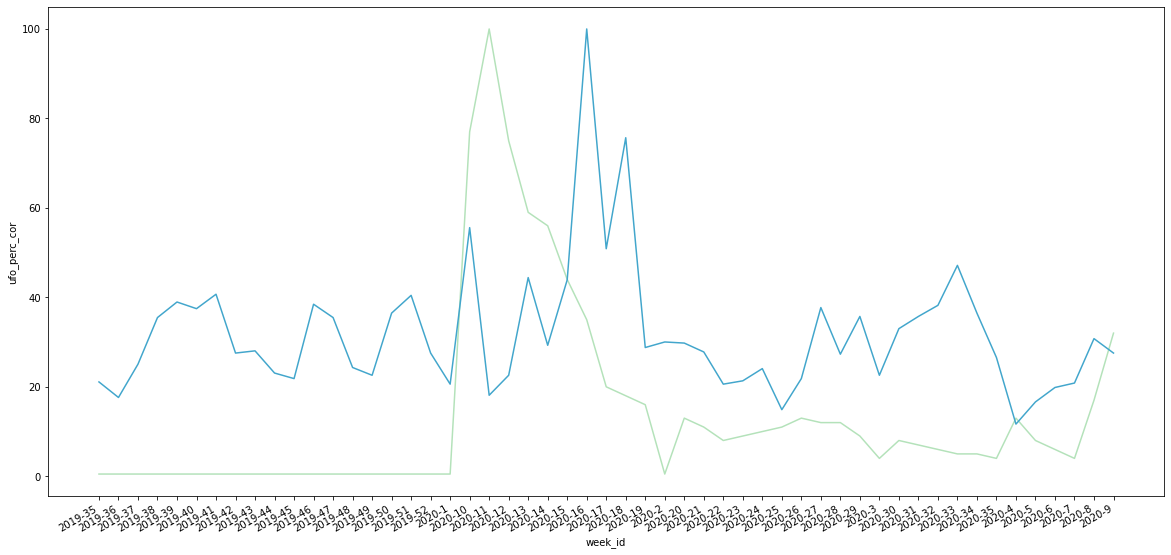

In [15]:
# plotting the ufos in blue and the corona search term values in green
fig, ax = plt.subplots ( figsize = (20, 10))
fig.autofmt_xdate()
#ax.fmt_xdata = 
palette1 = sns.set_palette('GnBu', 4)
ax1 = sns.lineplot ( x = combined['week_id'] , y = combined['rel_val'], color = palette1)
palette2 = sns.set_palette('GnBu', 8)
ax2 = sns.lineplot ( x = combined['week_id'], y= combined['ufo_perc_cor'], color = palette2)

#### Plotting financial crisis and ufos

In [17]:
fcrisis = data.loc[data['topic'] == 'fcrisis']

In [18]:
combined2 = pd.merge(ufos , fcrisis , how = 'inner', on = 'week_id')

In [19]:
# adding column with realtive values for ufos during period of fcrisis
max_ufos_fcrisis = combined2['weekly_ufocount'].max()
combined2 = combined2.assign(ufo_perc_fcrisis = (combined2['weekly_ufocount']/ max_ufos_fcrisis)* 100)

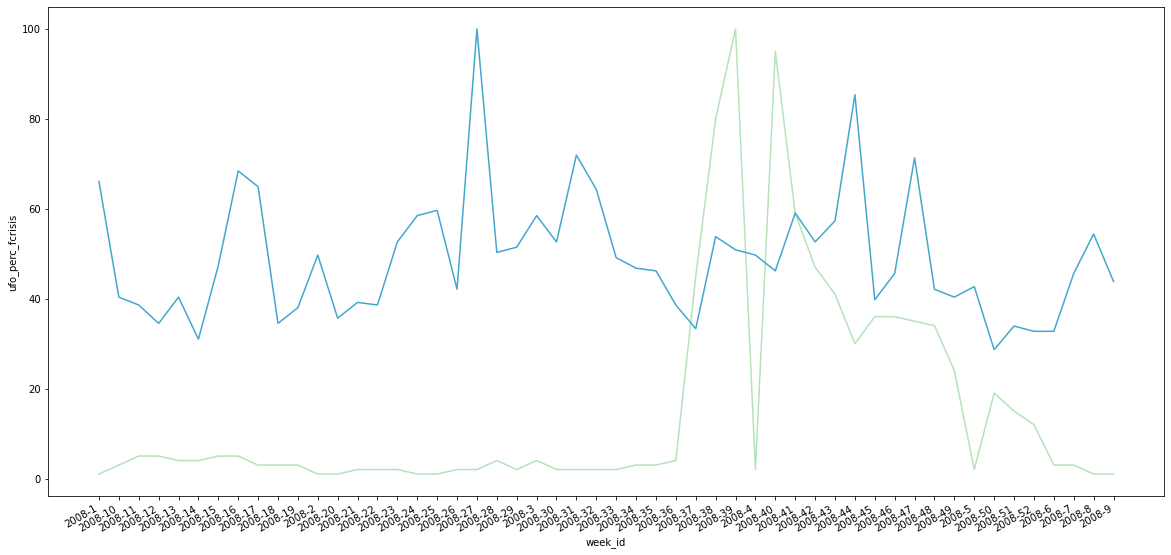

In [20]:
# plotting the ufos in blue and the fin. crisis search term values in green
fig, ax = plt.subplots ( figsize = (20, 10))
fig.autofmt_xdate()
#ax.fmt_xdata = 
ax1 = sns.lineplot ( x = combined2['week_id'] , y = combined2['rel_val'], color = palette1)

ax2 = sns.lineplot ( x = combined2['week_id'], y= combined2['ufo_perc_fcrisis'], color = palette2)

#### Plotting Boston Marathon bombings and ufos 

In [21]:
boston = data.loc[data['topic'] == 'boston']

In [22]:
combined3 = pd.merge( ufos , boston, how = 'inner', on = 'week_id')

In [23]:
# adding column with realtive values for weekly ufo count in 2013
max_ufos_boston = combined3['weekly_ufocount'].max()
combined3 = combined3.assign(ufo_perc_boston = (combined3['weekly_ufocount'] / max_ufos_boston)*100)

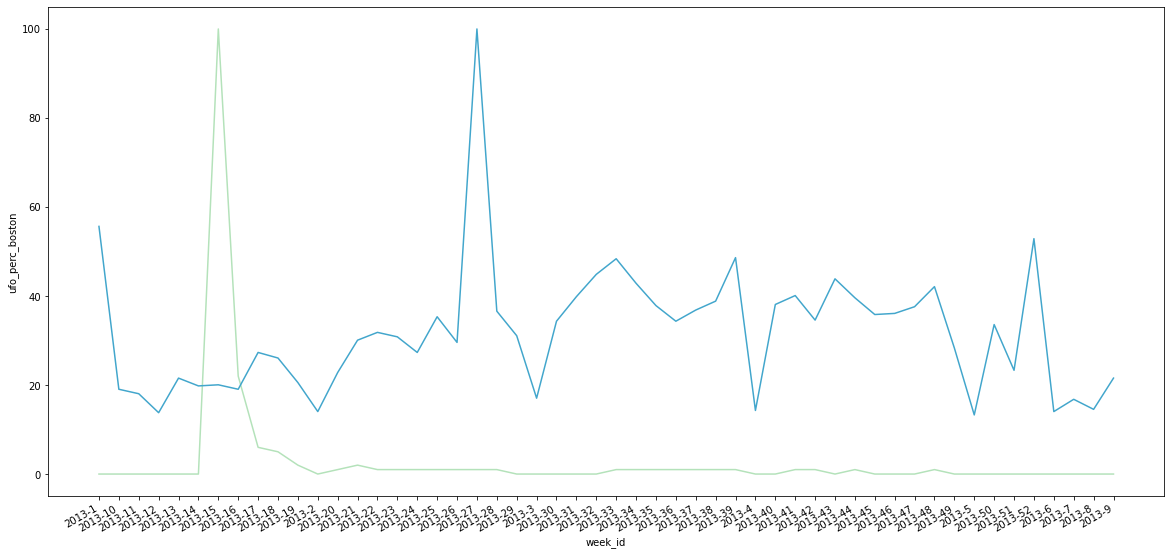

In [24]:
# plotting the ufos in blue and the boston marathon bombings data in green 
fig, ax = plt.subplots ( figsize = (20, 10))
fig.autofmt_xdate()
#ax.fmt_xdata = 
ax1 = sns.lineplot ( x = combined3['week_id'] , y = combined3['rel_val'], color = palette1)

ax2 = sns.lineplot ( x = combined3['week_id'], y= combined3['ufo_perc_boston'], color = palette2)


#### Plotting Arab Spring and ufos

In [25]:
arab = data.loc[data['topic'] == 'arab_spring']

In [26]:
combined4 = pd.merge(ufos, arab, how = 'inner', on = 'week_id')

In [27]:
#adding column with relative ufo values during arab spring
max_ufos_arab = combined4['weekly_ufocount'].max()
combined4 = combined4.assign(ufo_perc_arab= (combined4['weekly_ufocount']/ max_ufos_arab )*100 )


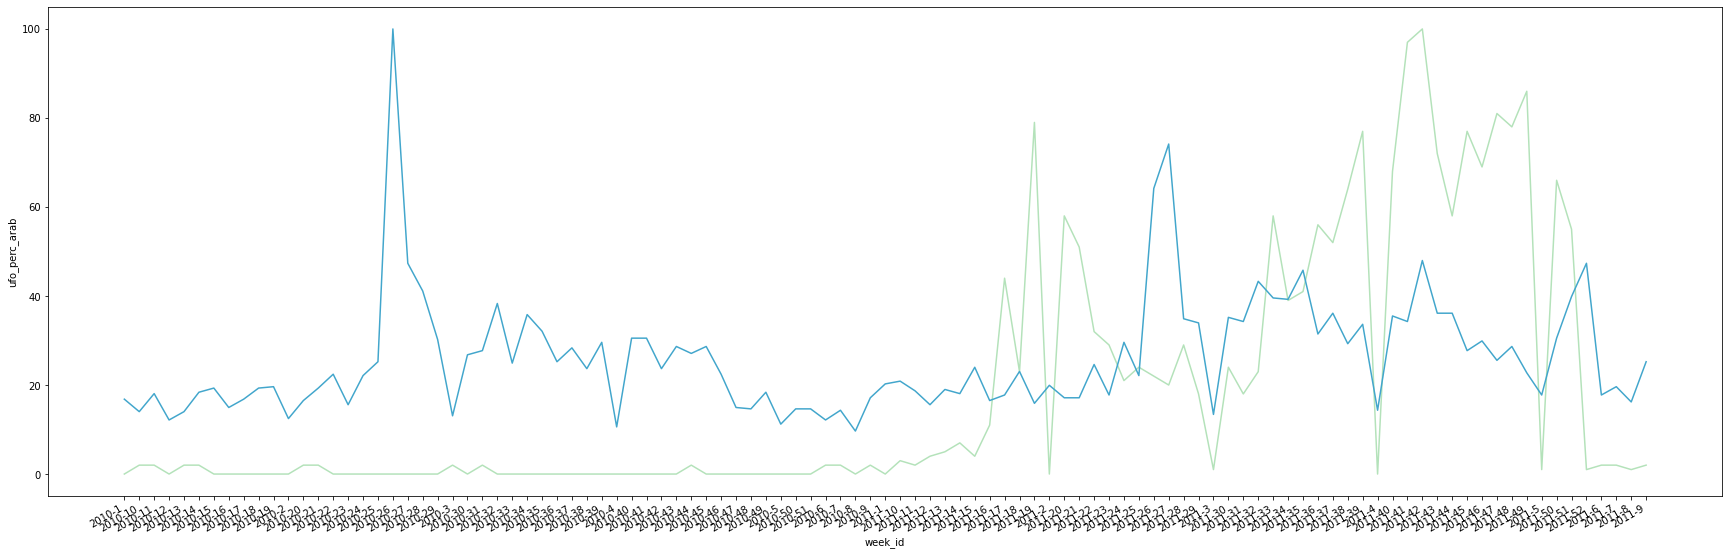

In [28]:
# plotting ufos in blue and arab spring  data in green
fig, ax = plt.subplots( figsize = (30, 10))
fig.autofmt_xdate()
ax1 = sns.lineplot( x = combined4['week_id'], y= combined4['rel_val'], color = palette1)
ax2 = sns.lineplot( x = combined4['week_id'], y= combined4['ufo_perc_arab'], color = palette2)

#### Plotting Kremlin data and ufos

In [29]:
kremlin = data.loc[data['topic'] == 'kremlin']

In [30]:
combined5 = pd.merge( ufos, kremlin, how = 'inner', on = 'week_id')

In [31]:
# adding column relative values ufocount for 2014
max_ufos_kremlin = combined5['weekly_ufocount'].max()
combined5 = combined5.assign(ufo_perc_kremlin = (combined5['weekly_ufocount'] / max_ufos_kremlin)*100)

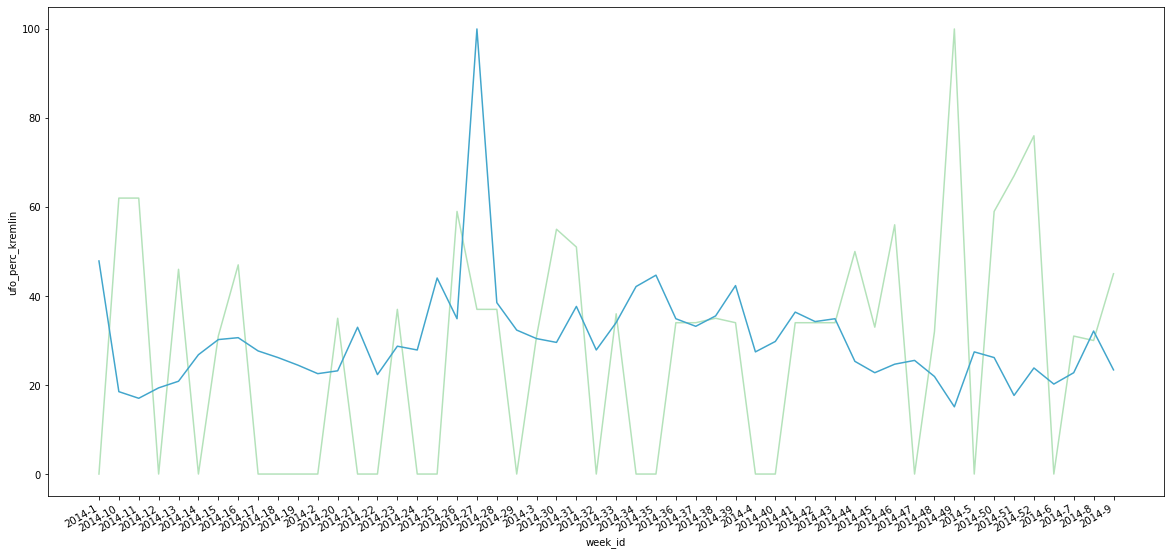

In [32]:
# plotting the ufos in blue and kremlin data in green
fig, ax = plt.subplots( figsize = (20, 10))
fig.autofmt_xdate()

ax1 = sns.lineplot( x = combined5['week_id'], y= combined5['rel_val'], color= palette1)
ax2 = sns.lineplot( x = combined5['week_id'], y = combined5['ufo_perc_kremlin'], color = palette2)

## 